In [25]:
# Libraries required for this calculator 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm
import ipywidgets as widgets 
from IPython.display import display

In [188]:

# Remember Littlewood's Rule: Dp > Pf * Pr[Xpf > Ypf]
def littlewoods_rule(pf, pd, mean, std_dev,capacity):
    # Calculate the critical ratio
    critical_ratio = pd / pf
    # Calculate the optimal protection level 
    protection_value = norm.ppf(1 - critical_ratio, loc=mean, scale=std_dev)
    # Values to plot a normal distribution
    x = np.linspace(mean - (3 * std_dev), mean + (3 * std_dev), 1000)
    y = norm.pdf(x, mean, std_dev)
    # Plot the normal distribution
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label="Demand Distribution")
    plt.axvline(protection_value, color='green', linestyle='--', label=f"Protection Value: {protection_value: .2f}")
    plt.title("Littlewood's calculator")
    plt.xlabel("Inventory Unit")
    plt.ylabel("Probability of distribution of Pf")
    plt.legend()
    plt.show()
    # Values to plot the complementary cummulative distribution
    a = np.linspace(mean - (3 * std_dev), mean + (3 * std_dev), 1000)
    b =  1 - norm.cdf(x, mean, std_dev)
    # Plot the complementary cummulative distribution function
    plt.figure(figsize=(10, 6))
    plt.plot(a, b, label="Complementary Distribution Function")
    plt.axvline(protection_value, color='green', linestyle='--', label=f"Protection Value: {protection_value: .2f}")
    plt.title("Complementary distribution function")
    plt.xlabel("Inventory Unit")
    plt.ylabel("Demand Being Bigger than or equal to Protection Value")
    plt.legend()
    plt.show()
    print(f"The optimal protection value is {round(protection_value,0)} and the booking limit is {round(capacity-protection_value,0)}")

Choose a full paying price:  300
Choose a discounted paying price:  275
Choose a mean demand for the full paying price:  60
Choose a standar deviation for the full paying price:  25
Choose a capacity (integer):  125


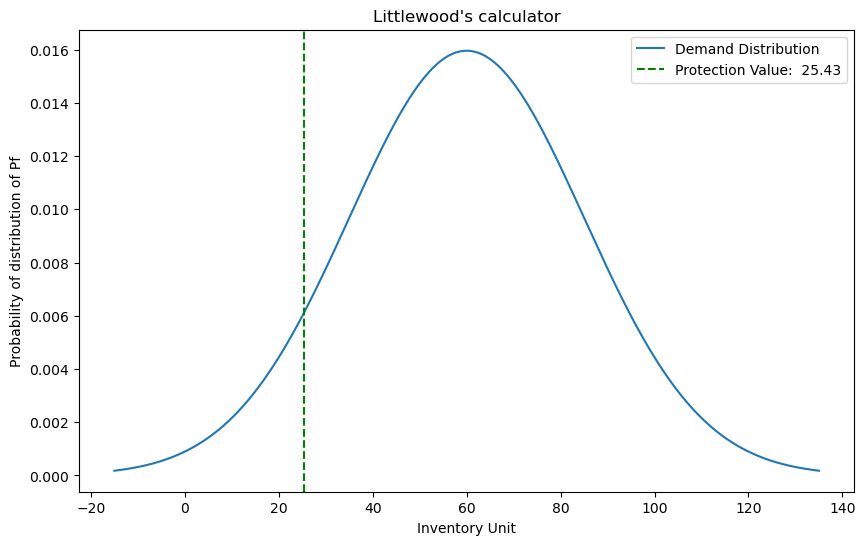

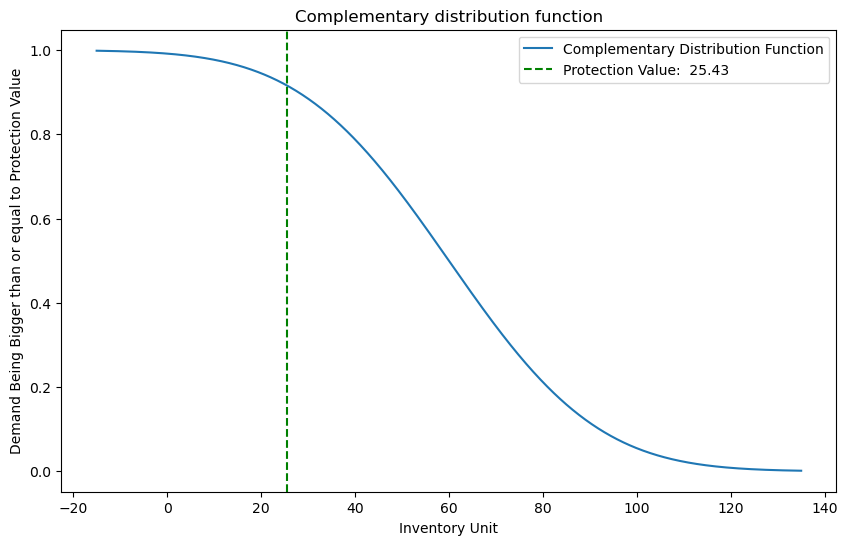

The optimal protection value is 25.0 and the booking limit is 100.0


In [190]:
#Choose some values
full_price = float(input("Choose a full paying price: "))
discounted_price = float(input("Choose a discounted paying price: "))
average = float(input("Choose a mean demand for the full paying price: "))
deviation = float(input("Choose a standar deviation for the full paying price: "))
capacity = int(input("Choose a capacity (integer): "))
littlewoods_rule(full_price, discounted_price, average, deviation, capacity)